<a href="https://colab.research.google.com/github/JavZon/Machine_Learning/blob/main/New_parametres_to_discover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()
bins=[0,1.5, 3.0, 4.5, 6.0, np.inf]
labels=[1,2,3,4,5]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['income_cat']=pd.cut(df['median_income'], bins=bins, labels=labels)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(df, df['income_cat']):
  train_set=df.loc[train_index]
  test_set=df.loc[test_index]


In [ ]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [ ]:
train_set.drop(columns='income_cat',inplace=True)
test_set.drop(columns='income_cat', inplace=True)

In [31]:
housing=train_set.copy()

In [33]:
housing.drop(columns='ocean_proximity', inplace=True)

In [34]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [35]:
housing.corrwith(housing['median_house_value'])

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
dtype: float64

In [59]:
housing[['rooms_per_household','person_per_household','bedrooms_per_room']].head()

,rooms_per_household,person_per_household,bedrooms_per_room
12655,5.485836,3.168555,0.205784
15502,6.927083,2.623698,0.160714
2908,5.393333,2.223333,0.191595
14053,3.886128,1.859213,0.276505
20496,6.096552,3.167241,0.182692


In [49]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['person_per_household']=housing['population']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']


In [43]:
5800/52

111.53846153846153

In [51]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
rooms_per_household     0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
person_per_household   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
bedrooms_per_room      -0.259952
dtype: float64

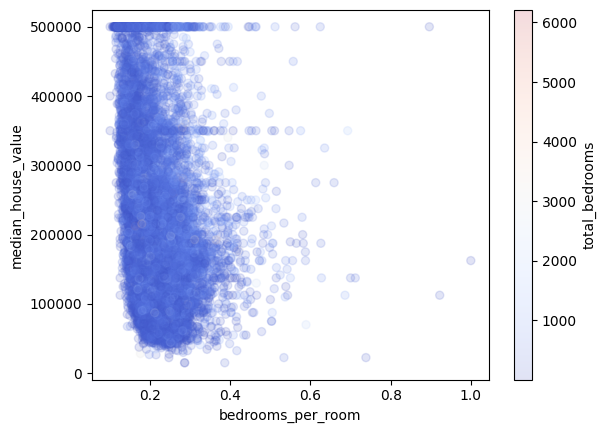

In [58]:
housing.plot(kind='scatter',
             x='bedrooms_per_room',
             y='median_house_value',
             alpha=0.153,
             s=34,
             c='total_bedrooms',
             cmap='coolwarm',
             colorbar=True)
plt.show()

In [60]:
housing[['rooms_per_household','person_per_household','bedrooms_per_room']].corrwith(housing['median_house_value'])

rooms_per_household     0.146255
person_per_household   -0.021991
bedrooms_per_room      -0.259952
dtype: float64